In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [2]:
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Note
Get P value of the multi regression model to ensure you have the correct set of input variables
Think of P value as the value that would help you determine if a particular variable has significant impact on regression

In [8]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values
X[1:5,:]

array([[2],
       [3],
       [4],
       [5]])

In [10]:
y[1:5]

array([ 50000,  60000,  80000, 110000])

In [11]:
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
# Fitting training data (Linear Regression)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Fitting training data (Polynomial Regression)
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

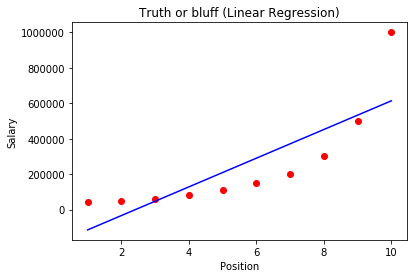

In [29]:
plt.scatter(X,y,color = 'red')
plt.plot(X, lin_reg.predict(X),color = 'blue')
plt.title('Truth or bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

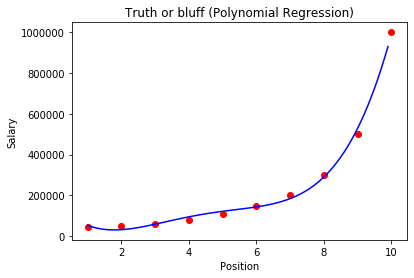

In [33]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,color = 'red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color = 'blue')
plt.title('Truth or bluff (Polynomial Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

## Predicting for X =6.5

In [45]:
#Linear Regression 
lin_reg.predict([[6.5]])

array([330378.78787879])

In [46]:
#Polynomial Regression 
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])

## Building optimal model using Backward Elimination

## Steps of Backward Elmination
1. Select a significance level(SL) to stay in the model
2. Fit the full model with all possible predictors
3. Consider the predictor with the highest P value.  If P >SL, goto step 4, otherwise finish
4. Remove the predictor
5. Fit the model without this variable
6. Repeat step 3

In [124]:
import statsmodels.api as sm

## Assumin SL =0.05

### Adding b0 constant
Need to add an array of ones to the begining of matrix for the stat model to realize this is a regression model of type
  y = b0 + b1*x1+ b2*x2+ b3*x3+ ... + bn*xn where b0 is the array of ones also called as intercept

In [125]:
X = np.append(arr = np.ones((X.shape[0],1)).astype(int) , values = X, axis = 1)
X_opt = X[:,[0,1,2,3,4,5]]

In [126]:
print(X.shape)
print(X_opt.shape)

(50, 6)
(50, 6)


In [127]:
print(X_opt.dtype)
print(y.dtype)

int64
float64


In [133]:
# Using Ordinary Least squares method for the regressor now
regressor_OLS = sm.OLS(endog = y.astype(int), exog = X_opt).fit();

In [134]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           1.34e-27
Time:                        13:48:37   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.836      7.281      0.000    3.62e+04     6.4e+04
x1           198.6230   3371.017      0.059      0.953   -6595.216    6992.462
x2           -41.9213   3256.050     -0.013      0.990   -6604.059    6520.216
x3             0.8060      0.046     17.368      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.783   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.267
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Iteration 1: x2 has highest P value, also greater than significance level(SL)
So removing x2 and fitting again

In [135]:
X_opt = X[:,[0,1,3,4,5]];
regressor_OLS = sm.OLS(endog = y.astype(int), exog = X_opt).fit();
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           8.49e-29
Time:                        13:52:57   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.884      7.537      0.000    3.67e+04    6.35e+04
x1           220.0101   2900.545      0.076      0.940   -5621.987    6062.008
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.759   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.173
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Iteration 2: x1 has highest P value, also greater than significance level(SL)
So removing x1 and fitting again

In [136]:
X_opt = X[:,[0,3,4,5]];
regressor_OLS = sm.OLS(endog = y.astype(int), exog = X_opt).fit();
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           4.53e-30
Time:                        13:54:00   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.366      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.839   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.443
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.587   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Iteration 3: x2 has highest P value, also greater than significance level(SL)
So removing x2 and fitting again

In [137]:
X_opt = X[:,[0,3,5]];
regressor_OLS = sm.OLS(endog = y.astype(int), exog = X_opt).fit();
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           2.16e-31
Time:                        13:59:42   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.934     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.265      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.162
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Iteration 3: x2 has highest P value, also greater than significance level(SL)
So removing x2 and fitting again

In [138]:
X_opt = X[:,[0,3]];
regressor_OLS = sm.OLS(endog = y.astype(int), exog = X_opt).fit();
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           3.50e-32
Time:                        14:02:12   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.895     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.537
Skew:                          -0.911   Prob(JB):                     9.43e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))"""